In [106]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
path = "C:/users/samhr/classwork/Group Project 1/Group Project 1 Data/Texas Voting Data/1976-2018-house.csv"
df = pd.read_csv(path, encoding = "ISO-8859-1")
df = df.set_index("state")
df = df.loc["Texas"]
df.head(60)

,year,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
state,,,,,,,,,,,,,,,,,,
Texas,1976,TX,48,74,49,US House,1,gen,False,False,James Hogan,republican,False,total,26334,161718.0,False,20171005
Texas,1976,TX,48,74,49,US House,1,gen,False,False,"Sam B. Hall, Jr.",democrat,False,total,135384,161718.0,False,20171005
Texas,1976,TX,48,74,49,US House,2,gen,False,False,Charles Wilson,democrat,False,total,133910,140902.0,False,20171005
Texas,1976,TX,48,74,49,US House,2,gen,False,False,James William Doyle III,american,False,total,6992,140902.0,False,20171005
Texas,1976,TX,48,74,49,US House,3,gen,False,False,James M. Collins,republican,False,total,171343,231413.0,False,20171005
Texas,1976,TX,48,74,49,US House,3,gen,False,False,"Les Shackelford, Jr.",democrat,False,total,60070,231413.0,False,20171005
Texas,1976,TX,48,74,49,US House,4,gen,False,False,Frank S. Glenn,republican,False,total,62641,168035.0,False,20171005
Texas,1976,TX,48,74,49,US House,4,gen,False,False,Ray Roberts,democrat,False,total,105394,168035.0,False,20171005
Texas,1976,TX,48,74,49,US House,5,gen,False,False,Nancy Judy,republican,False,total,56056,125768.0,False,20171005


In [3]:
df.dtypes

year                int64
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
district            int64
stage              object
runoff             object
special              bool
candidate          object
party              object
writein              bool
mode               object
candidatevotes     object
totalvotes        float64
unofficial           bool
version             int64
dtype: object

In [17]:
df["candidatevotes"] = df["candidatevotes"].astype("int")
df["vote_cap"] = df["candidatevotes"]/df["totalvotes"]*100


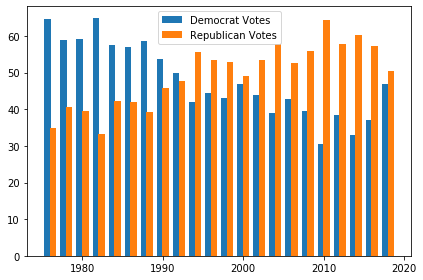

In [47]:
df = df.assign(id=df["year"].astype("str") + df["candidate"])
year_total_votes = df.groupby("year")['candidatevotes'].sum()
year_party_votes = df.groupby(["year", "party"])["candidatevotes"].sum()

party_vote_cap = year_party_votes/year_total_votes *100
party_vote_cap_df = pd.DataFrame(party_vote_cap)
party_vote_cap_df = party_vote_cap_df.reset_index().set_index("party")
party_vote_cap_df = party_vote_cap_df.loc[["democrat", "republican"], :]
vote_cap_df = party_vote_cap_df.reset_index().set_index('year')

dem_vote_cap_df = vote_cap_df[vote_cap_df["party"] == 'democrat'].reset_index()
rep_vote_cap_df = vote_cap_df[vote_cap_df["party"] != 'democrat'].reset_index()




In [6]:
df = df[~df["stage"].isna()].set_index("id")


In [7]:
df.dtypes

year                int64
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
district            int64
stage              object
runoff             object
special              bool
candidate          object
party              object
writein              bool
mode               object
candidatevotes      int32
totalvotes        float64
unofficial           bool
version             int64
vote_cap          float64
dtype: object

In [8]:
winners = df.groupby(['year', 'district'])["candidatevotes"].idxmax().values

In [9]:
voting_df = df.loc[winners]
voting_df

,year,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,vote_cap
id,,,,,,,,,,,,,,,,,,,
"1976Sam B. Hall, Jr.",1976,TX,48,74,49,US House,1,gen,False,False,"Sam B. Hall, Jr.",democrat,False,total,135384,161718.0,False,20171005,83.716098
1976Charles Wilson,1976,TX,48,74,49,US House,2,gen,False,False,Charles Wilson,democrat,False,total,133910,140902.0,False,20171005,95.037686
1976James M. Collins,1976,TX,48,74,49,US House,3,gen,False,False,James M. Collins,republican,False,total,171343,231413.0,False,20171005,74.042081
1976Ray Roberts,1976,TX,48,74,49,US House,4,gen,False,False,Ray Roberts,democrat,False,total,105394,168035.0,False,20171005,62.721457
1976Jim Mattox,1976,TX,48,74,49,US House,5,gen,False,False,Jim Mattox,democrat,False,total,67871,125768.0,False,20171005,53.965238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018Colin Allred,2018,TX,48,74,49,US House,32,gen,NaN,False,Colin Allred,democrat,False,total,144067,275620.0,False,20190110,52.270155
2018Marc Veasey,2018,TX,48,74,49,US House,33,gen,NaN,False,Marc Veasey,democrat,False,total,90805,119224.0,False,20190110,76.163356
2018Filemon B. Vela,2018,TX,48,74,49,US House,34,gen,NaN,False,Filemon B. Vela,democrat,False,total,85825,143068.0,False,20190110,59.988956


In [10]:
voting_df = voting_df.drop(["state_po", "state_fips", "state_cen", "state_ic", "office", "stage", "runoff", "special", "candidate", "writein", "mode", "unofficial", "version"], axis = 1)

In [11]:
voting_df["% of total votes"] = voting_df["candidatevotes"]/voting_df["totalvotes"]*100
voting_df

,year,district,party,candidatevotes,totalvotes,vote_cap,% of total votes
id,,,,,,,
"1976Sam B. Hall, Jr.",1976,1,democrat,135384,161718.0,83.716098,83.716098
1976Charles Wilson,1976,2,democrat,133910,140902.0,95.037686,95.037686
1976James M. Collins,1976,3,republican,171343,231413.0,74.042081,74.042081
1976Ray Roberts,1976,4,democrat,105394,168035.0,62.721457,62.721457
1976Jim Mattox,1976,5,democrat,67871,125768.0,53.965238,53.965238
...,...,...,...,...,...,...,...
2018Colin Allred,2018,32,democrat,144067,275620.0,52.270155,52.270155
2018Marc Veasey,2018,33,democrat,90805,119224.0,76.163356,76.163356
2018Filemon B. Vela,2018,34,democrat,85825,143068.0,59.988956,59.988956


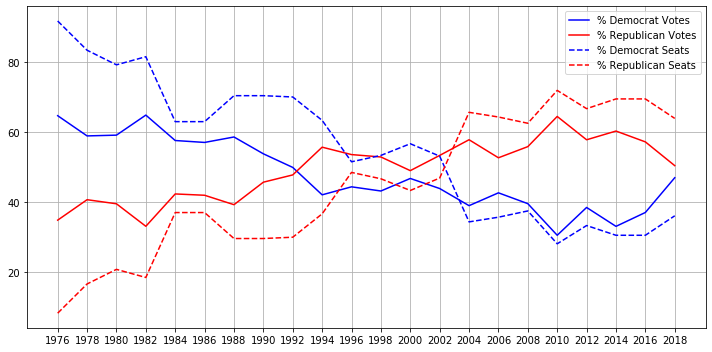

In [129]:
state_party_wins = voting_df.groupby("year")["party"].value_counts()

party_wins_df = pd.DataFrame(state_party_wins)

party_wins_df.columns = ["wins"]
party_wins_df = party_wins_df.reset_index()

dem_wins_df = party_wins_df[party_wins_df["party"] == 'democrat'].reset_index()
rep_wins_df = party_wins_df[party_wins_df["party"] != 'democrat'].reset_index()
dem_wins_df['% of seats'] = dem_wins_df['wins']/(rep_wins_df['wins']+dem_wins_df['wins'])*100

rep_wins_df['% of seats'] = rep_wins_df['wins']/(rep_wins_df['wins']+dem_wins_df['wins'])*100


fig, ax = plt.subplots()
ax.set_xticks(dem_vote_cap_df['year'])
ax.plot(dem_vote_cap_df['year'], dem_vote_cap_df["candidatevotes"], label='% Democrat Votes', color = 'b')
ax.plot(rep_vote_cap_df['year'], rep_vote_cap_df["candidatevotes"], label='% Republican Votes', color = 'r')



ax.plot(dem_wins_df["year"], dem_wins_df["% of seats"], '--b', label = '% Democrat Seats')
ax.plot(rep_wins_df["year"], rep_wins_df["% of seats"], '--r', label = '% Republican Seats')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.legend()
ax.grid(True)
plt.rcParams["figure.figsize"] = (10,5)
fig.tight_layout()